In [1]:
import numpy as np
import pandas as pd 
import h5py

np.random.seed(7)

def get_data(filename, flattened_input=True, normalize=True):
  data = h5py.File(filename, 'r')

  # 28 eta rows and 32 phi columns
  gTowerEt = data['gTowerEt'][:].reshape(-1, 28, 32)
  if flattened_input:
    gTowerEt = gTowerEt.reshape(-1, 28*32)
  offlineRho = data['offlineRho'][:]

  return (gTowerEt, offlineRho)


simple=False
gTowerEt_background, offlineRho = get_data("user.gstark.DSID.OUTPUT_v00.hdf5", flattened_input=simple)
gTowerEt_signal, offlineRho_signal = get_data("user.gstark.signal.OUTPUT_v00.hdf5", flattened_input = simple)



In [2]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
f.suptitle("$JZ0W$ images", fontsize = 18)
print gTowerEt_background.shape
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)

axarr[0,0].imshow(gTowerEt_background[0])
axarr[0,1].imshow(gTowerEt_background[1])
axarr[1,0].imshow(gTowerEt_background[2])
axarr[1,1].imshow(gTowerEt_background[3])

plt.show()

(250, 28, 32)


<Figure size 900x900 with 4 Axes>

(250, 28, 32)


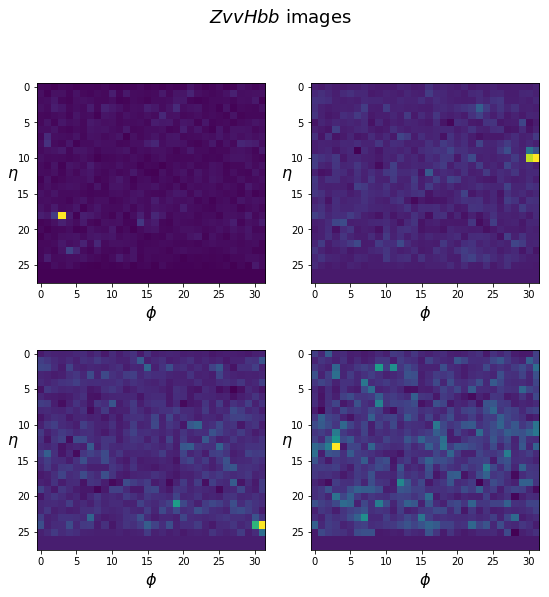

In [3]:
g, axarr = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
g.suptitle("$ZvvHbb$ images", fontsize = 18)
print gTowerEt_signal.shape
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)

axarr[0,0].imshow(gTowerEt_signal[2])
axarr[0,1].imshow(gTowerEt_signal[3])
axarr[1,0].imshow(gTowerEt_signal[4])
axarr[1,1].imshow(gTowerEt_signal[5])

Now I need to create labels and shuffle this data. But first I need to convert the data to a pandas array

In [4]:
def flatten_data(data, second_dim):
    """
        Flatten data from 3 Dimensions to 2 Dimensions
        data: 3D input
        second_dim: what we want to flatten the input into 
    """
    flat_array = data.reshape(-1, second_dim)
    return flat_array

#get the signal flattened
gTower_signal_flat = flatten_data(gTowerEt_signal, 28*32)
gTower_background_flat = flatten_data(gTowerEt_background, 28*32)

# check what the data looks like now
print gTower_signal_flat.shape, gTower_background_flat.shape

# convert to a pandas data frame
df_signal_flat = pd.DataFrame(gTower_signal_flat)
df_background_flat = pd.DataFrame(gTower_background_flat)

#check what the data looks like
print "Row 832 is the last row in signal with all zeros: sum(832) = {}".format(df_signal_flat[832].sum())
print "Row 831 is the first row in sgnal with not all zeros: sum(831) = {}".format(df_signal_flat[831].sum())

#drop zero columns
df_signal_flat.drop(df_signal_flat.columns[832:], axis=1, inplace=True)

print "Row 832 is the last row in background with all zeros: sum(832) = {}".format(df_background_flat[832].sum())
print "Row 831 is the first row in background with not all zeros: sum(831) = {}".format(df_background_flat[831].sum())

#drop zero columns
df_background_flat.drop(df_background_flat.columns[832:], axis=1, inplace=True)

df_signal_flat.head()

(250, 896) (250, 896)
Row 832 is the last row in signal with all zeros: sum(832) = 0.0
Row 831 is the first row in sgnal with not all zeros: sum(831) = 158110.078125
Row 832 is the last row in background with all zeros: sum(832) = 0.0
Row 831 is the first row in background with not all zeros: sum(831) = 114491.859375


,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,1948.007568,1229.803589,1362.211670,1773.021362,1805.363159,937.377747,770.113647,1283.386475,0.000000,463.752502,...,1453.622314,1195.590210,991.512695,595.912720,180.354721,337.931519,828.340332,862.571777,830.117065,797.693115
1,504.729767,1053.224731,1948.789429,472.535736,431.983521,1618.163696,1084.297852,522.354248,1145.151978,884.213806,...,674.066772,1018.593689,2172.189453,1589.266357,1166.685791,845.343872,433.920105,595.932251,2259.294922,1107.355469
2,949.828003,716.895020,123.326370,945.230530,718.803589,65.158417,812.612000,702.350159,560.865112,1201.162842,...,394.760132,0.000000,322.434998,591.893433,846.602661,-170.080933,975.725342,134.924530,3593.008057,1467.026855
3,226.033798,-61.546230,538.230469,27.106960,0.000000,177.788284,159.796814,568.038025,154.135437,0.000000,...,114.888306,78.900848,1171.467407,0.719444,492.379333,1436.708984,138.477692,80.839256,73.998993,-30.185978
4,-151.946899,429.102966,270.738861,205.938675,233.599579,532.302063,735.905396,104.528160,657.799927,-145.565964,...,344.546844,78.911766,1261.254395,620.452209,251.628922,482.965149,1691.376953,29.792877,784.313354,5042.091797


In [5]:
df_background_flat.head()

,0,1,2,3,4,5,6,7,8,9,...,822,823,824,825,826,827,828,829,830,831
0,102.223244,368.700684,137.223206,3186.571777,3.529137,0.000000,1580.153198,88.257584,241.882187,132.519989,...,-174.814178,1479.688599,442.842407,763.384705,183.145950,307.035736,380.927002,444.837280,524.020386,197.409546
1,1862.122681,725.858398,495.343079,522.689270,1037.605713,1459.342163,1467.959839,951.591431,1289.745483,0.000000,...,1474.365601,754.765991,804.412048,987.892090,949.158386,317.838837,1316.921509,711.112122,566.910278,1134.835327
2,1338.201538,63.295807,1250.506104,1.934196,105.690559,1010.898010,814.236450,68.646568,-44.988132,871.175598,...,128.142059,99.144165,91.923775,337.149536,-27.088104,296.295044,826.219788,259.561218,504.078888,118.668991
3,508.373199,357.868134,54.637264,761.106384,240.089447,100.703369,477.226807,444.954498,702.838623,109.055504,...,524.925659,1218.190186,0.000000,983.982910,704.678345,472.131653,111.450127,762.669006,20.642662,627.526917
4,1759.074219,1074.358521,51.794151,659.456604,-419.165039,619.112854,219.199036,487.793335,622.421021,32.543133,...,678.214233,395.708679,401.175659,570.642761,652.222168,319.069214,204.106003,1265.324707,103.765228,440.996307


In [6]:
def add_ones_or_zeros(data_frame, one_or_zero):
    """
        data_frame: should be a pandas Data Frame
        
        add ones or zeros to data depending on whether it is signal or background
    """
    if one_or_zero == 1:
        label = np.ones(len(data_frame))
        label_series = pd.Series(label)
        
        
    elif one_or_zero == 0:
        label = np.zeros(len(data_frame))
        label_series = pd.Series(label)
        
    else:
        print("Error: Not a 1 or 0")
        return None
    
    data_frame["832"] = label_series
    return data_frame 
    
df_signal_with_label = add_ones_or_zeros(df_signal_flat, 1)
df_background_with_label = add_ones_or_zeros(df_background_flat, 0)

df_signal_with_label.head()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
0,1948.007568,1229.803589,1362.211670,1773.021362,1805.363159,937.377747,770.113647,1283.386475,0.000000,463.752502,...,1195.590210,991.512695,595.912720,180.354721,337.931519,828.340332,862.571777,830.117065,797.693115,1.0
1,504.729767,1053.224731,1948.789429,472.535736,431.983521,1618.163696,1084.297852,522.354248,1145.151978,884.213806,...,1018.593689,2172.189453,1589.266357,1166.685791,845.343872,433.920105,595.932251,2259.294922,1107.355469,1.0
2,949.828003,716.895020,123.326370,945.230530,718.803589,65.158417,812.612000,702.350159,560.865112,1201.162842,...,0.000000,322.434998,591.893433,846.602661,-170.080933,975.725342,134.924530,3593.008057,1467.026855,1.0
3,226.033798,-61.546230,538.230469,27.106960,0.000000,177.788284,159.796814,568.038025,154.135437,0.000000,...,78.900848,1171.467407,0.719444,492.379333,1436.708984,138.477692,80.839256,73.998993,-30.185978,1.0
4,-151.946899,429.102966,270.738861,205.938675,233.599579,532.302063,735.905396,104.528160,657.799927,-145.565964,...,78.911766,1261.254395,620.452209,251.628922,482.965149,1691.376953,29.792877,784.313354,5042.091797,1.0


In [7]:
df_background_with_label.head()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
0,102.223244,368.700684,137.223206,3186.571777,3.529137,0.000000,1580.153198,88.257584,241.882187,132.519989,...,1479.688599,442.842407,763.384705,183.145950,307.035736,380.927002,444.837280,524.020386,197.409546,0.0
1,1862.122681,725.858398,495.343079,522.689270,1037.605713,1459.342163,1467.959839,951.591431,1289.745483,0.000000,...,754.765991,804.412048,987.892090,949.158386,317.838837,1316.921509,711.112122,566.910278,1134.835327,0.0
2,1338.201538,63.295807,1250.506104,1.934196,105.690559,1010.898010,814.236450,68.646568,-44.988132,871.175598,...,99.144165,91.923775,337.149536,-27.088104,296.295044,826.219788,259.561218,504.078888,118.668991,0.0
3,508.373199,357.868134,54.637264,761.106384,240.089447,100.703369,477.226807,444.954498,702.838623,109.055504,...,1218.190186,0.000000,983.982910,704.678345,472.131653,111.450127,762.669006,20.642662,627.526917,0.0
4,1759.074219,1074.358521,51.794151,659.456604,-419.165039,619.112854,219.199036,487.793335,622.421021,32.543133,...,395.708679,401.175659,570.642761,652.222168,319.069214,204.106003,1265.324707,103.765228,440.996307,0.0


Now I want to combine these two data frames and shuffle them so that they are randomly distributed.

In [8]:
df = pd.concat([df_background_with_label, df_signal_with_label])

In [9]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
58,648.082886,491.050415,264.998016,340.861786,416.619324,68.302826,577.698181,-89.663094,1972.208740,28.743515,...,12.312655,452.818573,445.934143,450.193359,382.620789,470.296875,403.003876,694.358215,79.808388,1.0
13,71.738922,498.596710,591.032715,907.466553,691.178345,194.780701,1447.311279,275.156921,1026.792969,521.576233,...,1325.186890,519.492432,492.679596,342.348450,499.667419,1374.241943,143.100342,355.563934,570.851196,0.0
164,313.326538,429.424683,439.604187,2574.545898,581.749939,2070.865479,1422.916382,209.511612,118.244034,1805.155640,...,232.484360,-88.932686,1560.565308,501.602814,97.477554,1013.331543,3497.514404,735.360962,277.719269,1.0
32,0.000000,408.872894,125.938103,116.795204,20.897364,232.187653,-73.598099,205.436035,-274.540894,77.425705,...,-19.865376,32.464630,925.371216,607.089905,246.260529,102.187523,24.874170,203.251404,172.379501,0.0
210,104.926575,357.535400,1458.209717,518.077209,520.141846,939.256470,1067.829712,200.830368,951.934631,868.971924,...,284.662018,1037.101562,661.914612,138.275192,484.622406,-89.790329,266.659271,917.786438,504.011932,1.0


In [10]:
labels = df['832']
labels = np.array(labels)
print labels[:10]

[1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]


In [11]:
df.drop(df.columns[832], axis=1, inplace=True)
images = np.array(df)
print len(images[0])

832


In [12]:
images_reshaped = images[:].reshape(-1, 26, 32)

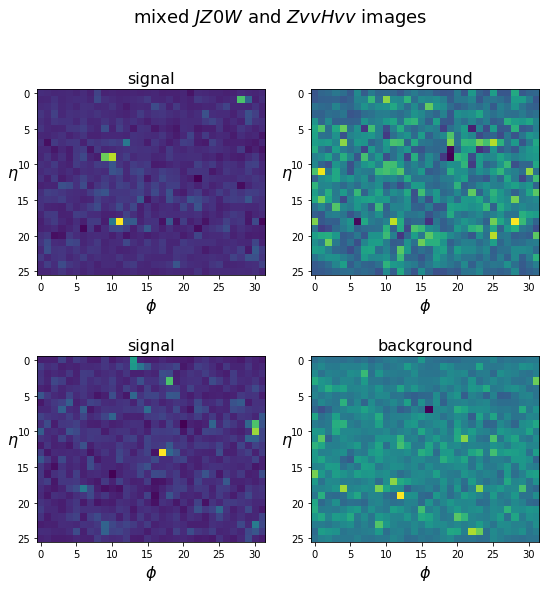

In [13]:
def signal_or_background(label):
    """
        Tells us if the image is signal or background for plotting
    """
    if label == 0.0:
        return "background"
    else:
        return "signal"


f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
f.suptitle("mixed $JZ0W$ and $ZvvHvv$ images", fontsize = 18)
axarr[0,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[0,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,0].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)
axarr[1,1].set_ylabel("$\eta$ ", fontsize=16).set_rotation(0)

axarr[0,0].set_xlabel("$\phi$", fontsize=16)
axarr[0,1].set_xlabel("$\phi$", fontsize=16)
axarr[1,0].set_xlabel("$\phi$", fontsize=16)
axarr[1,1].set_xlabel("$\phi$", fontsize=16)

axarr[0,0].set_title("{}".format(signal_or_background(labels[0])), fontsize=16)
axarr[0,1].set_title("{}".format(signal_or_background(labels[1])), fontsize=16)
axarr[1,0].set_title("{}".format(signal_or_background(labels[2])), fontsize=16)
axarr[1,1].set_title("{}".format(signal_or_background(labels[3])), fontsize=16)

axarr[0,0].imshow(images_reshaped[0])
axarr[0,1].imshow(images_reshaped[1])
axarr[1,0].imshow(images_reshaped[2])
axarr[1,1].imshow(images_reshaped[3])

In [14]:
images_reshaped = images[:].reshape(-1, 26, 32, 1)

In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

labels_cat = to_categorical(labels, num_classes = 2)
print labels_cat[:10]

Using TensorFlow backend.


[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(26,32,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(images_reshaped)

batch_size = 64
epochs = 20

In [17]:
history = model.fit_generator(datagen.flow(images_reshaped, labels_cat, batch_size = batch_size), epochs = epochs, verbose=2, steps_per_epoch=images_reshaped.shape[0] // batch_size, callbacks = [reduce_lr])

Epoch 1/20
 - 3s - loss: 0.6703 - acc: 0.7210
Epoch 2/20
 - 1s - loss: 0.6334 - acc: 0.7594
Epoch 3/20
 - 1s - loss: 0.5781 - acc: 0.7372
Epoch 4/20
 - 1s - loss: 0.4886 - acc: 0.7787
Epoch 5/20
 - 2s - loss: 0.4933 - acc: 0.8002
Epoch 6/20
 - 2s - loss: 0.4512 - acc: 0.8190
Epoch 7/20
 - 2s - loss: 0.4124 - acc: 0.8270
Epoch 8/20
 - 2s - loss: 0.4730 - acc: 0.8125
Epoch 9/20
 - 2s - loss: 0.4558 - acc: 0.8192
Epoch 10/20
 - 2s - loss: 0.4852 - acc: 0.7829
Epoch 11/20
 - 2s - loss: 0.4101 - acc: 0.8156
Epoch 12/20
 - 2s - loss: 0.4039 - acc: 0.8253
Epoch 13/20
 - 2s - loss: 0.4573 - acc: 0.8203
Epoch 14/20
 - 2s - loss: 0.4378 - acc: 0.8120
Epoch 15/20
 - 2s - loss: 0.4152 - acc: 0.8333
Epoch 16/20
 - 2s - loss: 0.4062 - acc: 0.8250
Epoch 17/20
 - 2s - loss: 0.3934 - acc: 0.8225
Epoch 18/20
 - 2s - loss: 0.4017 - acc: 0.8313
Epoch 19/20
 - 2s - loss: 0.3810 - acc: 0.8481
Epoch 20/20
 - 2s - loss: 0.3813 - acc: 0.8407


In [19]:
print(history.history.keys())

['acc', 'loss', 'lr']


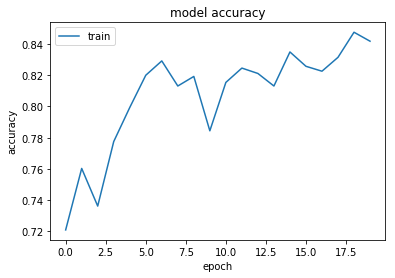

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()